(31, 58)


/home/maite/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:80: RuntimeWarning: invalid value encountered in log


<function matplotlib.pyplot.show>

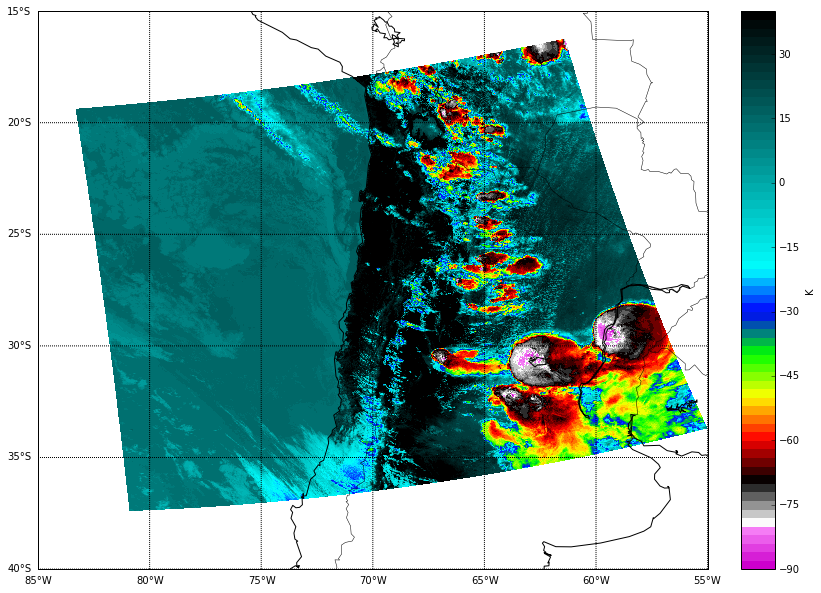

In [3]:
# -*- coding: utf-8 -*-

%matplotlib inline

# Importamos las librerias necesarias para trabajar
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
from pyhdf.SD import SD, SDC
import scipy.io as sio
from matplotlib.ticker import FixedLocator
import pprint
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

file_name = '/media/maite/UUI/Materia_Satelites/TP_final/MYD021KM.A2012338.1830.006.2012340052122.hdf'
file = SD(file_name, SDC.READ)
print(file.info())

datasets_dic = file.datasets()
    
sds_obj = file.select('EV_1KM_Emissive') # selecciona el SDS
DN = sds_obj.get() # extrae los datos del SDS (16 canales IR!!!)

for key, value in sds_obj.attributes().items():
#    print (key, value)
    if key == 'radiance_offsets':
        radiance_offsets = value  
    if key == 'radiance_scales':
        radiance_scales = value 

# CANAL 21 (3.959)
B21 = radiance_scales[1] * ( DN[1,:,:] - radiance_offsets[1] )
B21 = B21*1e6 # Units: Watts/m^2/m/steradian

# CANAL 22 (3.959)
B22 = radiance_scales[2] * ( DN[2,:,:] - radiance_offsets[2] )
B22 = B22*1e6 # Units: Watts/m^2/m/steradian

# CANAL 27 (6.715)
B27 = radiance_scales[6] * ( DN[6,:,:] - radiance_offsets[6] )
B27 = B27*1e6 # Units: Watts/m^2/m/steradian

# CANAL 28 (7.325)
B28 = radiance_scales[7] * ( DN[7,:,:] - radiance_offsets[7] )
B28 = B28*1e6 # Units: Watts/m^2/m/steradian

# CANAL 29 (8.550)
B29 = radiance_scales[8] * ( DN[8,:,:] - radiance_offsets[8] )
B29 = B29*1e6 # Units: Watts/m^2/m/steradian

# CANAL 31 (11.03)
B31 = radiance_scales[10] * ( DN[10,:,:] - radiance_offsets[10] )
B31 = B31*1e6 # Units: Watts/m^2/m/steradian

# CANAL 32 (12.02)
B32 = radiance_scales[11] * ( DN[11,:,:] - radiance_offsets[11] )
B32 = B32*1e6 # Units: Watts/m^2/m/steradian

# CANAL 33 (13.335)
B33 = radiance_scales[12] * ( DN[12,:,:] - radiance_offsets[12] )
B33 = B33*1e6 # Units: Watts/m^2/m/steradian

#=================================================================#

# Estas constantes son las mismas para todo los canales emisivos

c = 2.99792458e8  # Velocidad de la luz en el vacio [m/s]
h = 6.6260755e-34 # Constante de Planck [J s]
k = 1.380658e-23  # Constante de Boltzmann [J/K]

#=================================================================#

L = 3.959*1e-6 # Longitud de onda [m]
C1 = h*c
C2 = k*L
C3 = 2*h*np.power(c,2)/np.power(L,5)

TB21 = C1/(C2*np.log((C3/B21)+1)) # Temperatura de brillo en K

#=================================================================#

L = 3.959*1e-6 # Longitud de onda [m]
C1 = h*c
C2 = k*L
C3 = 2*h*np.power(c,2)/np.power(L,5)

TB22 = C1/(C2*np.log((C3/B22)+1)) # Temperatura de brillo en K

#=================================================================#

L = 6.715*1e-6 # Longitud de onda [m]
C1 = h*c
C2 = k*L
C3 = 2*h*np.power(c,2)/np.power(L,5)

TB27 = C1/(C2*np.log((C3/B27)+1)) # Temperatura de brillo en K

#=================================================================#

L = 7.325*1e-6 # Longitud de onda [m]
C1 = h*c
C2 = k*L
C3 = 2*h*np.power(c,2)/np.power(L,5)

TB28 = C1/(C2*np.log((C3/B28)+1)) # Temperatura de brillo en K

#=================================================================#

L = 8.55*1e-6 # Longitud de onda [m]
C1 = h*c
C2 = k*L
C3 = 2*h*np.power(c,2)/np.power(L,5)

TB29 = C1/(C2*np.log((C3/B29)+1)) # Temperatura de brillo en K

#=================================================================#

L = 11.03*1e-6 # Longitud de onda [m]
C1 = h*c
C2 = k*L
C3 = 2*h*np.power(c,2)/np.power(L,5)

TB31 = C1/(C2*np.log((C3/B31)+1)) # Temperatura de brillo en K

#=================================================================#

L = 12.02*1e-6 # Longitud de onda [m]
C1 = h*c
C2 = k*L
C3 = 2*h*np.power(c,2)/np.power(L,5)

TB32 = C1/(C2*np.log((C3/B32)+1)) # Temperatura de brillo en K

#=================================================================#

L = 13.335*1e-6 # Longitud de onda [m]
C1 = h*c
C2 = k*L
C3 = 2*h*np.power(c,2)/np.power(L,5)

TB33 = C1/(C2*np.log((C3/B33)+1)) # Temperatura de brillo en K

#=================================================================#


file_name = '/media/maite/UUI/Materia_Satelites/TP_final/MYD03.A2012338.1830.006.2012339234912.hdf'
file = SD(file_name, SDC.READ)
    
sds_obj = file.select('Latitude') # # selecciona el SDS
LAT = sds_obj.get() # extrae los datos del SDS

sds_obj = file.select('Longitude') # # selecciona el SDS
LON = sds_obj.get() # extrae los datos del SDS

cdict = {'blue': [(0.0, 0.0, 0.8), (0.076923077, 1, 1), (0.153846154, 0, 0),(0.230769231, 0.0, 0.0),(0.307692308, 0.0, 0.0),(0.384615385, 0.0, 0.0),(0.461538462, 1, 1),(0.538461538, 1, 1), (1.0, 0.0, 1)],
'green': [(0.0, 0.0, 0.0), (0.076923077, 0.6, 1), (0.153846154, 0, 0),(0.230769231, 0.0, 0),(0.307692308, 1,1),(0.384615385, 1, 1),(0.461538462, 0, 0),(0.538461538, 1, 1), (1.0, 0.0, 0.0)],
'red': [(0.0, 0.0, 0.8), (0.076923077, 1, 1), (0.153846154, 0, 0),(0.230769231, 1, 1),(0.307692308, 1, 1),(0.384615385, 0, 0.0),(0.461538462, 0.0, 0.0),(0.538461538, 0, 0), (1.0, 0.0, 0)]}

cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,65)


fig = plt.figure(figsize=(15, 10))
m = Basemap(projection='cyl',llcrnrlat=-40,urcrnrlat=-15,llcrnrlon=-85,urcrnrlon=-55,resolution='l')
cs=m.pcolor(LON,LAT,TB31-273,vmin=-90,vmax=40,latlon=True,cmap=cmap)
m.drawparallels(np.arange(-60,0,5),labels=[1,0,0,0])
m.drawmeridians(np.arange(-90,-35,5),labels=[0,0,0,1])
m.drawcoastlines()
m.drawcountries()
cbar = m.colorbar(cs,pad="5%")
cbar.set_label('K')
plt.show